Библиотеки, которые используются в решении:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import time
%matplotlib inline

### Стыров Даниил, 307 группа.

# Практическое задание №1 по ОММ 
# Вариант №28


## Постановка задачи

Используя схему бегущего счета и итерационные методы, решить задачу:

$$
\begin{align}
    \frac{\partial u}{\partial t} - \frac{2 u}{1 + u^{2}} 
        \frac{\partial u}{\partial x} &= 0, \ -1 \leq x < 0, \\
    u(x,0) &= \cos{\frac{\pi x}{2}}, \\
    u(0,t) &= 1 + \frac{1}{2} \arctan{t}. \\
\end{align}
$$

## Построение характеристик

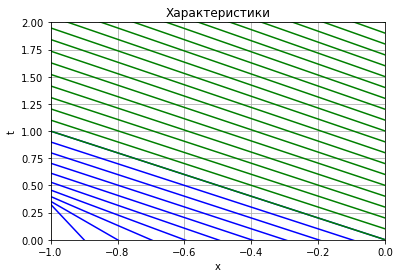

In [3]:
xmin =  -1
xmax = 0
tmin = 0
tmax = 2

def c1(x):
    return  [-(1 + (np.cos(np.pi * x0 * 0.5))*(np.cos(np.pi * x0 *0.5)))/(2 * (np.cos(np.pi*x0/2)))*(x-x0) for x0 in np.arange(xmin , xmax + 0.1, 0.1)]
def c2(x):
    return [t0 - (1 + (1 + 0.5 * np.arctan(t0)) * (1 + 0.5 * np.arctan(t0)))/(2 * (1 + 0.5 * np.arctan(t0))) * x for t0 in np.arange(tmin , tmax + 0.1, 0.1)]
    
x_arr = np.arange(xmin , xmax + 0.1, 0.1)
x_array = [c1(x) for x in  x_arr]
t_array = [c2(x) for x in  x_arr]

plt.plot()
plt.ylim(tmin , tmax)
plt.xlim(xmin , xmax)
plt.plot(x_arr , x_array , color = "blue")
plt.plot(x_arr , t_array , color = "green")
plt.title('Характеристики')
plt.ylabel('t')
plt.xlabel('x')
plt.grid(True)
plt.show()

## Разностная сетка

In [4]:
N = 100     # число узлов вдоль оси x
M = 100     # число узлов по времни

x_min, x_max = -1, 0
t_min, t_max = 0, 1

h = -float(x_max - x_min)/(N - 1)    # шаг вдоль оси x
τ = float(t_max - t_min)/(M - 1)     # шаг по времени
ε = 1e-6                             # точность

u = np.zeros((N, M), dtype=float)
x = np.linspace(x_min, x_max, N)
t = np.linspace(t_min, t_max, M)

# ГУ и НУ
u[M-1, :] = 1 + 0.5*np.arctan(t)
u[:, 0] = np.cos(np.pi*x/2)

In [5]:
def F(u):
    return -np.log(1+u**2)

def dF(u):
    return -2*u/(1 + u**2)

def f(u, a, b):
    return (u - a)/τ + (F(u) - F(b))/h

def df(u):
    return 1/τ + dF(u)/h

def solve(a, b):
    result = b
    d = 1 + ε
    while(d > ε):
        y = result
        result = y - f(y, a, b)/df(y)
        d = np.abs(y - result)
    return result

In [6]:
start = time.time()
for i in range(N-2,  -1,  -1):
    for j in range(1, M):
        u[i, j] = solve(u[i, j-1], u[i+1, j])
end = time.time()
print('Время вычисления', np.round(end - start, 3))

Время вычисления 0.381


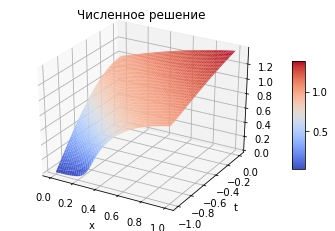

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
tm, xm = np.meshgrid(t, x)
surf = ax.plot_surface(tm, xm, u, cmap='coolwarm')
plt.ylabel('t')
plt.xlabel('x')
plt.title('Численное решение')
fig.colorbar(surf, shrink=0.5, aspect=8)

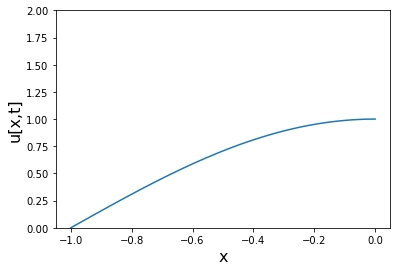

In [8]:
fig, ax = plt.subplots()
ax.set_ylim(0, 2)
plt.xlabel('x', fontsize=16)
plt.ylabel('u[x,t]', fontsize=16)

line = ax.plot(x, u[..., 0])[0]

def init():
    line.set_ydata([np.nan]*len(x))
    return line,

def animate(i):
    line.set_ydata(u[..., i])
    return line,

anim = animation.FuncAnimation(fig, animate, interval=10)
writervideo = animation.FFMpegWriter(fps=60)

<ipython-input-9-4c5df5abba7a>:5: RuntimeWarning: invalid value encountered in double_scalars
  return c/(-2*np.sin(np.pi*c/2)*np.exp(-(np.sin(np.pi*c/2))**2)) + x/(2*np.sin(np.pi*c/2)*np.exp(-(np.sin(np.pi*c/2))**2))
<ipython-input-9-4c5df5abba7a>:5: RuntimeWarning: divide by zero encountered in true_divide
  return c/(-2*np.sin(np.pi*c/2)*np.exp(-(np.sin(np.pi*c/2))**2)) + x/(2*np.sin(np.pi*c/2)*np.exp(-(np.sin(np.pi*c/2))**2))
<ipython-input-9-4c5df5abba7a>:5: RuntimeWarning: invalid value encountered in true_divide
  return c/(-2*np.sin(np.pi*c/2)*np.exp(-(np.sin(np.pi*c/2))**2)) + x/(2*np.sin(np.pi*c/2)*np.exp(-(np.sin(np.pi*c/2))**2))


(0, 2)

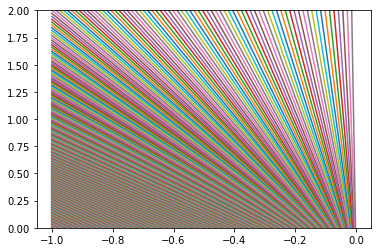

In [9]:
N = 500
x1 = np.linspace(-1, 0, N)

def t1(x,c):
    return c/(-2*np.sin(np.pi*c/2)*np.exp(-(np.sin(np.pi*c/2))**2)) + x/(2*np.sin(np.pi*c/2)*np.exp(-(np.sin(np.pi*c/2))**2))

fig = plt.figure()
ax = fig.gca()

for i in range(1, N):
    ax.plot(x1, t1(x1, x1[i]))

ax.set_ylim(0, 2)